In [2]:
import tsfresh
import pandas as pd
import os
import numpy as np
import csv
from imageio import imread
from tqdm import tqdm
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [3]:
timeseries = pd.read_csv("data.csv")
timeseries
    

,id,time,F_x
0,0,0,7.305720
1,0,20,10.227431
2,0,40,9.785273
3,0,60,8.128497
4,0,80,9.353404
...,...,...,...
1905745,1023,14300,59.091217
1905746,1023,14320,62.430440
1905747,1023,14340,61.081034
1905748,1023,14360,60.854649


In [4]:
y_data = {}
stable_example = 0
stable_example_found = False
malfunction_example = 0
malfunction_example_found = False
with open('y_index.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
        if int(rows[1]) == 0:
            y_data[int(rows[0])] = False
            if not stable_example_found:
                stable_example = int(rows[0])
                stable_example_found = True
                
        else:
            y_data[int(rows[0])] = True
            if not malfunction_example_found:
                malfunction_example = int(rows[0])
                malfunction_example_found = True
y = pd.Series(y_data)

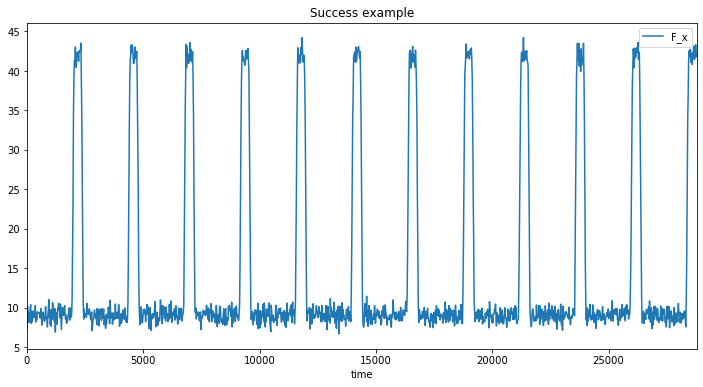

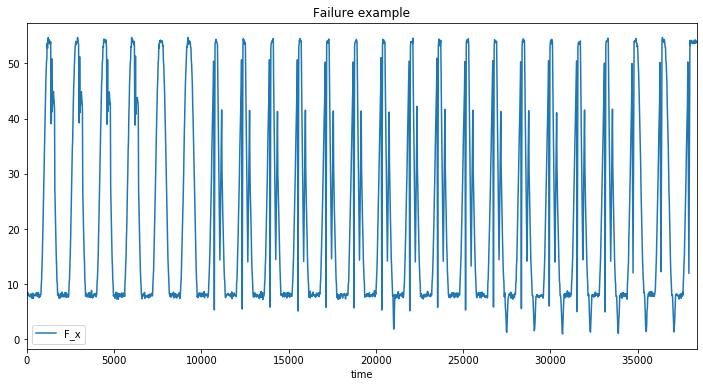

In [33]:
timeseries[timeseries.id == stable_example][['time', 'F_x']].plot(x='time', title='Success example', figsize=(12, 6));
timeseries[timeseries.id == malfunction_example][['time', 'F_x']].plot(x='time', title='Failure example', figsize=(12, 6));

In [34]:
extraction_settings = ComprehensiveFCParameters()

X = extract_features(timeseries, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)

Feature Extraction: 100%|██████████| 15/15 [57:12<00:00, 228.81s/it] 


In [39]:
X_filtered = select_features(X, y)
X_filtered


variable,"F_x__fft_coefficient__coeff_1__attr_""abs""","F_x__fft_coefficient__coeff_2__attr_""abs""","F_x__fft_coefficient__coeff_3__attr_""abs""","F_x__fft_coefficient__coeff_5__attr_""abs""","F_x__fft_coefficient__coeff_10__attr_""abs""","F_x__fft_coefficient__coeff_4__attr_""abs""","F_x__fft_coefficient__coeff_25__attr_""abs""","F_x__fft_coefficient__coeff_6__attr_""abs""","F_x__fft_coefficient__coeff_35__attr_""abs""","F_x__fft_coefficient__coeff_11__attr_""abs""",...,"F_x__fft_coefficient__coeff_56__attr_""angle""","F_x__fft_coefficient__coeff_79__attr_""real""","F_x__fft_coefficient__coeff_13__attr_""real""","F_x__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""intercept""","F_x__fft_coefficient__coeff_84__attr_""real""",F_x__quantile__q_0.1,"F_x__fft_coefficient__coeff_77__attr_""angle""","F_x__fft_coefficient__coeff_99__attr_""angle""","F_x__fft_coefficient__coeff_80__attr_""real""","F_x__fft_coefficient__coeff_91__attr_""angle"""
id,,,,,,,,,,,,,,,,,,,,,
0,29.465073,37.307811,16.851118,41.713045,27.748996,30.388812,19.510432,14.319100,15.581733,21.153008,...,25.688053,48.870681,16.853668,10.503357,556.580704,8.193827,-20.193573,42.918570,14.907928,-92.107772
1,60.310693,57.897119,48.402638,60.459181,60.188066,71.236814,90.934104,3396.843730,69.542060,60.048626,...,99.656403,-0.449119,25.053068,7.937584,3.439325,6.114945,111.911387,144.304273,-25.933269,135.245721
2,25.788115,13.718393,22.415754,33.049727,24.412085,28.641731,26.958634,40.212160,35.414424,42.445566,...,74.000718,16.539818,43.520967,23.591261,3.309708,-0.071218,72.172572,85.581193,8.664662,72.930421
3,104.200383,46.580311,83.369279,48.633648,20.779193,63.991357,30.223523,66.045713,50.674571,49.881974,...,105.428030,45.153459,16.178592,3.836435,40.747070,-1.549493,11.874498,112.269912,35.067314,70.252442
4,1822.766668,931.101725,125.885266,232.779659,205.439548,374.759817,1537.613406,226.160386,83.890115,29.352012,...,114.281442,-64.427226,104.023155,16.115614,-184.548551,7.715496,149.424450,-109.182107,-41.095688,122.497396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,56.769099,46.302614,39.422782,40.097470,55.109784,62.657712,53.931527,56.391400,41.389953,32.652765,...,102.976726,20.272651,35.885826,19.577731,42.787103,3.473370,147.513220,124.761224,-11.879496,41.815875
1020,27.767212,11.858368,57.640246,38.808172,49.079096,30.320538,61.341197,4099.071574,71.140616,80.539779,...,106.292608,-7.405412,-18.329875,24.246911,1.821212,13.883839,123.360973,120.605170,-12.066480,139.951204
1021,108.304637,85.719858,170.284703,125.512865,134.042387,109.770600,58.724937,1607.655020,72.096176,160.766522,...,112.139082,-30.733448,61.325780,7.682415,29.232686,8.094791,89.107473,-121.800508,-55.429735,115.265795


In [40]:
X_full_train, X_full_test, y_train, y_test = train_test_split(X, y, test_size=.4)
X_filtered_train, X_filtered_test = X_full_train[X_filtered.columns], X_full_test[X_filtered.columns]
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_full_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_full_test)))

              precision    recall  f1-score   support

       False       0.96      0.97      0.96       334
        True       0.87      0.80      0.84        76

    accuracy                           0.94       410
   macro avg       0.91      0.89      0.90       410
weighted avg       0.94      0.94      0.94       410



In [41]:
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97       334
        True       0.88      0.83      0.85        76

    accuracy                           0.95       410
   macro avg       0.92      0.90      0.91       410
weighted avg       0.95      0.95      0.95       410



In [5]:
import pandas as pd
from tsfresh.feature_extraction import extract_features
from tsfresh import defaults
from tsfresh.feature_selection import select_features
from tsfresh.utilities.dataframe_functions import restrict_input_to_index, impute, get_ids


ids_container = get_ids(df_or_dict=timeseries, column_id="id")
ids_y = set(y.index)

ids_container
ids_y
"The following ids are in the time series container but are missing in y: {}".format(ids_container - ids_y)

'The following ids are in the time series container but are missing in y: set()'

In [6]:
features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 15/15 [53:40<00:00, 214.67s/it] 


In [16]:
#features_filtered_direct.to_csv('C:\Users\feor\Code\src', header=None, index=None, sep=' ', mode='a')
with open("tsfresh_1024.txt", "w") as f:
    for col_name in features_filtered_direct.columns: 
        f.write(col_name + "\n")


In [10]:
extraction_settings = ComprehensiveFCParameters()

X = extract_features(timeseries, column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     # we impute = remove all NaN features automatically
                     impute_function=impute)


Feature Extraction: 100%|██████████| 12/12 [01:51<00:00,  9.25s/it]
